In [1]:
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install statsmodels
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.stattools import acf, pacf
#from prophet import Prophet
!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html

 #Lendo o CSV e definindo a coluna 'id' como índice
df = pd.read_csv("/content/Dados Históricos - Ibovespa (4).csv")

# Adicionando uma nova coluna 'ID' com números sequenciais
df.reset_index(drop=False, inplace=True)
df.rename(columns={'index': 'id'}, inplace=True)

df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 27.9 MB/s eta 0:00:00


<ipython-input-1-f53bc2457fd9>:12: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-f53bc2457fd9>:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


,id,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,0,02.01.2024,132.697,134.186,134.195,132.095,"8,44M","-1,11%"
1,1,28.12.2023,134.185,134.194,134.389,133.832,"7,81M","-0,01%"
2,2,27.12.2023,134.194,133.523,134.195,133.328,"6,17M","0,49%"
3,3,26.12.2023,133.533,132.753,133.645,132.753,"5,15M","0,59%"
4,4,22.12.2023,132.753,132.182,133.035,132.094,"8,23M","0,43%"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1242 non-null   int64  
 1   Data      1242 non-null   object 
 2   Último    1242 non-null   float64
 3   Abertura  1242 non-null   float64
 4   Máxima    1242 non-null   float64
 5   Mínima    1242 non-null   float64
 6   Vol.      1242 non-null   object 
 7   Var%      1242 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 77.8+ KB


In [3]:
df = df.rename(columns={'Data': 'ds', 'Último': 'y'})
df.set_index('id', inplace=True)

In [4]:
df


,ds,y,Abertura,Máxima,Mínima,Vol.,Var%
id,,,,,,,
0,02.01.2024,132.697,134.186,134.195,132.095,"8,44M","-1,11%"
1,28.12.2023,134.185,134.194,134.389,133.832,"7,81M","-0,01%"
2,27.12.2023,134.194,133.523,134.195,133.328,"6,17M","0,49%"
3,26.12.2023,133.533,132.753,133.645,132.753,"5,15M","0,59%"
4,22.12.2023,132.753,132.182,133.035,132.094,"8,23M","0,43%"
...,...,...,...,...,...,...,...
1237,09.01.2019,93.613,92.033,93.626,92.028,"5,17M","1,72%"
1238,08.01.2019,92.032,91.699,92.231,91.064,"4,64M","0,36%"
1239,07.01.2019,91.699,91.845,92.552,91.288,"4,71M","-0,15%"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ds        1242 non-null   object 
 1   y         1242 non-null   float64
 2   Abertura  1242 non-null   float64
 3   Máxima    1242 non-null   float64
 4   Mínima    1242 non-null   float64
 5   Vol.      1242 non-null   object 
 6   Var%      1242 non-null   object 
dtypes: float64(4), object(3)
memory usage: 77.6+ KB


In [6]:
# Lista das colunas a serem removidas
colunas_para_remover = ['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%']

# Remover as colunas especificadas do DataFrame
df = df.drop(columns=colunas_para_remover)

In [7]:
df

,ds,y
id,,
0,02.01.2024,132.697
1,28.12.2023,134.185
2,27.12.2023,134.194
3,26.12.2023,133.533
4,22.12.2023,132.753
...,...,...
1237,09.01.2019,93.613
1238,08.01.2019,92.032
1239,07.01.2019,91.699


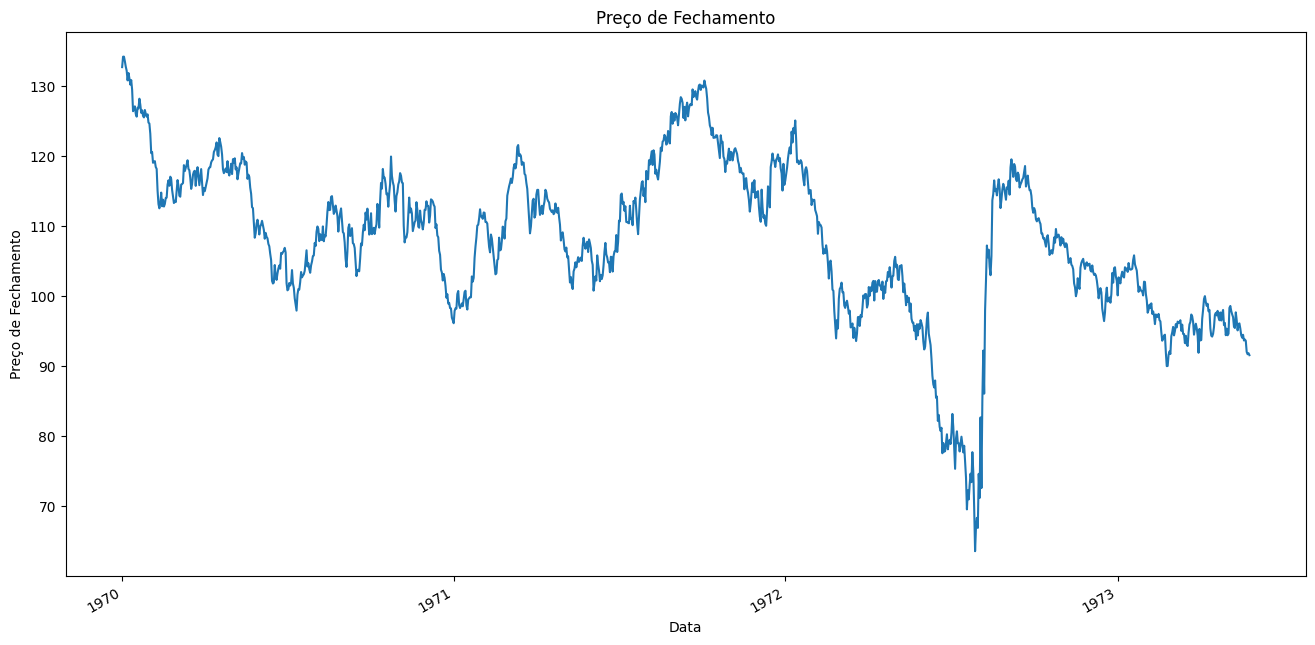

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



plt.figure(figsize=(16, 8))
plt.plot(df['ds'], df['y'])

plt.title('Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')

# Configurar o formato do eixo x para exibir apenas o ano
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rotacionar os anos para melhor visualização

plt.show()

<ipython-input-9-50aa3cad26f0>:27: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbak_fgo6/8_q0h24n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbak_fgo6/r2k53pgp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86427', 'data', 'file=/tmp/tmpbak_fgo6/8_q0h24n.json', 'init=/tmp/tmpbak_fgo6/r2k53pgp.json', 'output', 'file=/tmp/tmpbak_fgo6/prophet_model794y696u/prophet_model-20240108113936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:39:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Cha

Os DataFrames não têm o mesmo número de amostras. Verifique os dados.
MAE: 11.40536799194547
MSE: 203.49446562856897
RMSE: 14.26514863674995


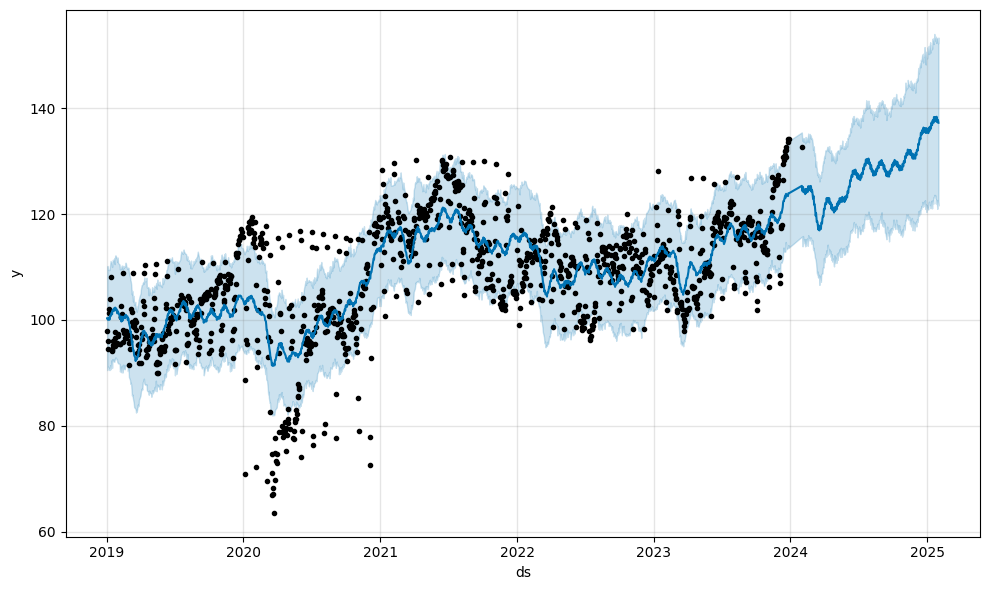

In [9]:
from prophet import Prophet


# Suponha que você tenha um DataFrame 'df' com as colunas 'ds' (datas) e 'y' (valores)
# ...


#m = Prophet()

# Adicionando feriados nacionais brasileiros
feriados_sp = pd.DataFrame({
    'holiday': 'feriados_sp',
    'ds': pd.to_datetime(['2024-01-25', '2024-02-25', '2024-03-25', '2024-04-25', '2024-05-25',
                          '2024-06-25', '2024-07-25', '2024-08-25', '2024-09-25', '2024-10-25',
                          '2024-11-25', '2024-12-25']),
    'lower_window': 0,
    'upper_window': 0,
})



# Criando o modelo Prophet
m = Prophet(holidays=feriados_sp)


# Converter 'ds' para o formato de data, se necessário
df['ds'] = pd.to_datetime(df['ds'])

# Adicionando feriados semanais (sábados e domingos)
#Cria campo is_weekend com 0 e 1 - significando fim de semana
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)
m.add_regressor('is_weekend')

m.fit(df)

# Criando o dataframe para previsão futura
future = m.make_future_dataframe(periods=365)
future['is_weekend'] = (future['ds'].dt.weekday >= 5).astype(int)
forecast = m.predict(future)

forecast





#m.fit(df)

# Criando o dataframe para previsão futura
#future = m.make_future_dataframe(periods=30)

# Realizando a previsão
#forecast = m.predict(future)

# Plotando os resultados
fig = m.plot(forecast)

from prophet.diagnostics import performance_metrics

# Calculando métricas de desempenho
#df_cv = performance_metrics(df)
#print(df_cv.head())
# este procedimento está dando erro

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Verificar se os DataFrames têm o mesmo número de amostras
# df e forecast são diferentes pois forecast foi levado em conta os feridos e fins de semana
if df.shape[0] == forecast.shape[0]:
    # Calcular métricas
    mae = mean_absolute_error(df['y'], forecast['yhat'])
    mse = mean_squared_error(df['y'], forecast['yhat'])
    rmse = np.sqrt(mse)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
else:
    print("Os DataFrames não têm o mesmo número de amostras. Verifique os dados.")





# Calculando as previsões do modelo para os dados de teste
# Calculando novamente forecast para todos os dados, vai ser prossivel calcular as métricas
forecast = m.predict(df)

# Calculando o MAE entre as previsões e os valores reais
mae = mean_absolute_error(df['y'], forecast['yhat'])

print(f'MAE: {mae}')
mse = mean_squared_error(df['y'], forecast['yhat'])
rmse = mean_squared_error(df['y'], forecast['yhat'], squared=False)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

In [10]:
future



,ds,is_weekend
0,2019-01-02,0
1,2019-01-03,0
2,2019-01-04,0
3,2019-01-07,0
4,2019-01-08,0
...,...,...
1602,2025-01-27,0
1603,2025-01-28,0
1604,2025-01-29,0
1605,2025-01-30,0


In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,97.235094,90.726528,110.053853,97.235094,97.235094,3.086381,3.086381,3.086381,0.0,...,0.183832,0.183832,0.183832,2.902549,2.902549,2.902549,0.0,0.0,0.0,100.321475
1,2019-01-03,97.252032,90.655891,110.096462,97.252032,97.252032,3.069815,3.069815,3.069815,0.0,...,0.188275,0.188275,0.188275,2.881540,2.881540,2.881540,0.0,0.0,0.0,100.321848
2,2019-01-04,97.268971,90.282916,109.327767,97.268971,97.268971,2.758574,2.758574,2.758574,0.0,...,-0.120982,-0.120982,-0.120982,2.879556,2.879556,2.879556,0.0,0.0,0.0,100.027545
3,2019-01-07,97.319787,90.744688,109.731992,97.319787,97.319787,3.126505,3.126505,3.126505,0.0,...,0.127829,0.127829,0.127829,2.998676,2.998676,2.998676,0.0,0.0,0.0,100.446292
4,2019-01-08,97.336726,90.106093,109.415070,97.336726,97.336726,2.696543,2.696543,2.696543,0.0,...,-0.383177,-0.383177,-0.383177,3.079720,3.079720,3.079720,0.0,0.0,0.0,100.033269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,2023-12-22,120.313014,114.231492,133.311737,120.313014,120.313014,3.281517,3.281517,3.281517,0.0,...,-0.120982,-0.120982,-0.120982,3.402500,3.402500,3.402500,0.0,0.0,0.0,123.594531
1238,2023-12-26,120.446480,113.000042,132.869495,120.446480,120.446480,2.952660,2.952660,2.952660,0.0,...,-0.383177,-0.383177,-0.383177,3.335837,3.335837,3.335837,0.0,0.0,0.0,123.399140
1239,2023-12-27,120.479846,114.478157,133.255631,120.479846,120.479846,3.461138,3.461138,3.461138,0.0,...,0.183832,0.183832,0.183832,3.277306,3.277306,3.277306,0.0,0.0,0.0,123.940984
1240,2023-12-28,120.513213,114.345831,134.233898,120.513213,120.513213,3.398826,3.398826,3.398826,0.0,...,0.188275,0.188275,0.188275,3.210551,3.210551,3.210551,0.0,0.0,0.0,123.912039


In [12]:
# Filtrando o DataFrame forecast para a data '2024-01-02'
prediction_2024_01_02 = forecast[forecast['ds'] == pd.to_datetime('2024-02-01')]

# Obtendo o valor previsto (yhat) para '2024-01-02'
yhat_2024_01_02 = prediction_2024_01_02['yhat'].values[0]

print(f"Valor previsto para '2024-01-02': {yhat_2024_01_02}")


Valor previsto para '2024-01-02': 125.33215277517787


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbak_fgo6/926cfl5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbak_fgo6/v3sdm9yw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68736', 'data', 'file=/tmp/tmpbak_fgo6/926cfl5c.json', 'init=/tmp/tmpbak_fgo6/v3sdm9yw.json', 'output', 'file=/tmp/tmpbak_fgo6/prophet_modelr5y8cy1t/prophet_model-20240108113938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:39:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:39:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


A data 2024-01-25 não está disponível nas previsões ou é feriado/final de semana.
A data {data} não está disponível nas previsões.


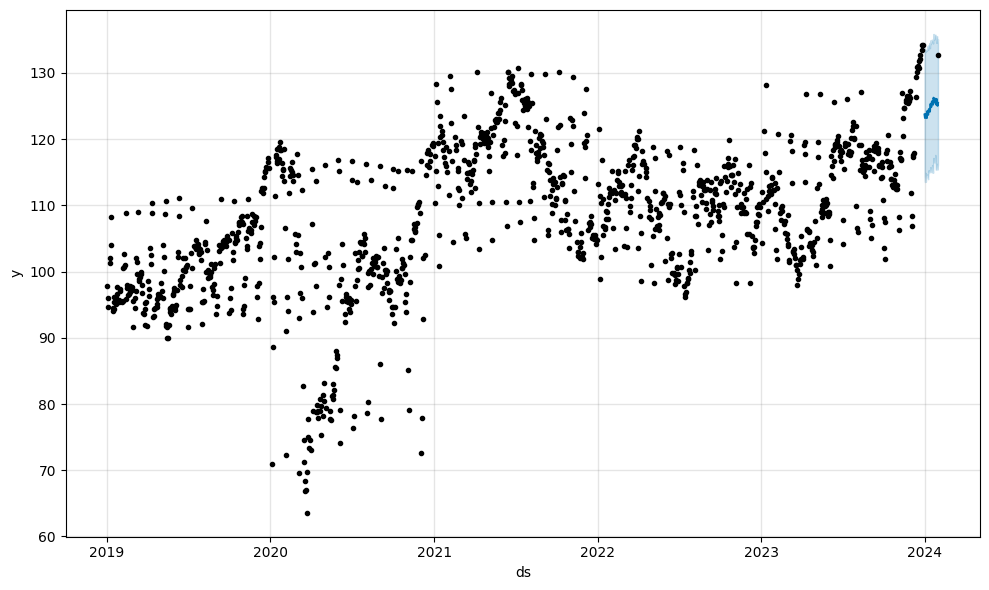

In [13]:
from prophet import Prophet
import pandas as pd



# Criando o modelo Prophet
feriados_sp = pd.DataFrame({
    'holiday': 'feriados_sp',
    'ds': pd.to_datetime(['2024-01-25', '2024-02-25', '2024-03-25', '2024-04-25', '2024-05-25',
                          '2024-06-25', '2024-07-25', '2024-08-25', '2024-09-25', '2024-10-25',
                          '2024-11-25', '2024-12-25']),
    'lower_window': 0,
    'upper_window': 0,
})


m = Prophet(holidays=feriados_sp)

# Adicionando feriados semanais (sábados e domingos)
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)
m.add_regressor('is_weekend')

m.fit(df)  # Ajustando o modelo com o DataFrame original

# Estendendo o período de previsão para incluir janeiro de 2024
future_dates = pd.date_range(start='2024-01-01', periods=31, freq='D')

future = pd.DataFrame({'ds': future_dates})
future['is_weekend'] = (future['ds'].dt.weekday >= 5).astype(int)

future

# Fazendo a previsão com base nas datas futuras
forecast = m.predict(future)

# Plotando os resultados para o período estendido
fig_extended = m.plot(forecast)

# Imprimir o valor previsto (yhat) para '2024-01-15'
# o período de previsão vai até dia 31 de janeiro de 2024
data = '2024-01-25'

prediction1 = forecast[(forecast['ds'] == pd.to_datetime(data)) & (~forecast['ds'].isin(feriados_sp['ds'])) & (forecast['is_weekend'] == 0)]

if not prediction1.empty:
    yhat_period = prediction1['yhat'].values[0]
    print(f"Valor previsto para {data}: {yhat_period}")
else:
    print(f"A data {data} não está disponível nas previsões ou é feriado/final de semana.")


#
    print("A data {data} não está disponível nas previsões.")


In [14]:
# pode-se ver que somente o período extendido está em azul (forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbak_fgo6/4vlal2v4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbak_fgo6/z4s58q1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63398', 'data', 'file=/tmp/tmpbak_fgo6/4vlal2v4.json', 'init=/tmp/tmpbak_fgo6/z4s58q1_.json', 'output', 'file=/tmp/tmpbak_fgo6/prophet_modelynryrxvo/prophet_model-20240108113939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


A data 2024-01-07 não está disponível nas previsões ou é feriado/final de semana.


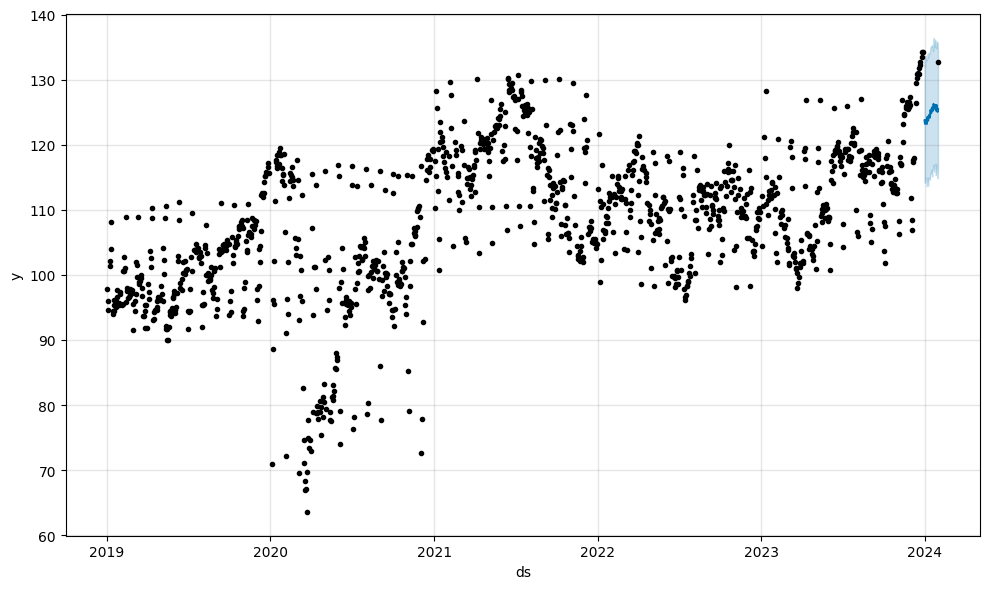

In [15]:
from prophet import Prophet
import pandas as pd



# Criando o modelo Prophet
feriados_sp = pd.DataFrame({
    'holiday': 'feriados_sp',
    'ds': pd.to_datetime(['2024-01-25', '2024-02-25', '2024-03-25', '2024-04-25', '2024-05-25',
                          '2024-06-25', '2024-07-25', '2024-08-25', '2024-09-25', '2024-10-25',
                          '2024-11-25', '2024-12-25']),
    'lower_window': 0,
    'upper_window': 0,
})


m = Prophet(holidays=feriados_sp)

# Adicionando feriados semanais (sábados e domingos)
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)
m.add_regressor('is_weekend')

m.fit(df)  # Ajustando o modelo com o DataFrame original

# Estendendo o período de previsão para incluir janeiro de 2024
future_dates = pd.date_range(start='2024-01-01', periods=31, freq='D')

future = pd.DataFrame({'ds': future_dates})
future['is_weekend'] = (future['ds'].dt.weekday >= 5).astype(int)

future

# Fazendo a previsão com base nas datas futuras
forecast = m.predict(future)

# Plotando os resultados para o período estendido
fig_extended = m.plot(forecast)

# Imprimir o valor previsto (yhat) para '2024-01-15'
# o período de previsão vai até dia 31 de janeiro de 2024
data = '2024-01-25'

# ... (seu código anterior)

data = '2024-01-07'

prediction1 = forecast[(forecast['ds'] == pd.to_datetime(data)) & (~forecast['ds'].isin(feriados_sp['ds'])) & (forecast['is_weekend'] == 0)]

if not prediction1.empty:
    yhat_period = prediction1['yhat'].values[0]
    print(f"Valor previsto para {data}: {yhat_period}")
else:
    print(f"A data {data} não está disponível nas previsões ou é feriado/final de semana.")
